# Exploration of GABA Receptors

In [1]:
cd ..

/cellar/users/agross/TCGA_Code/DX/Notebooks


importing IPython notebook from metaPCNA

importing IPython notebook from Imports

0.922514619883


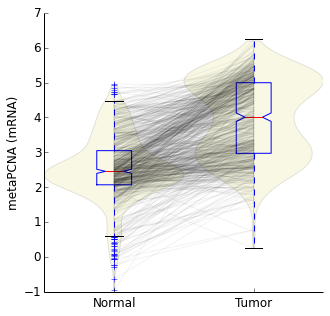

In [2]:
import NotebookImport
from metaPCNA import *

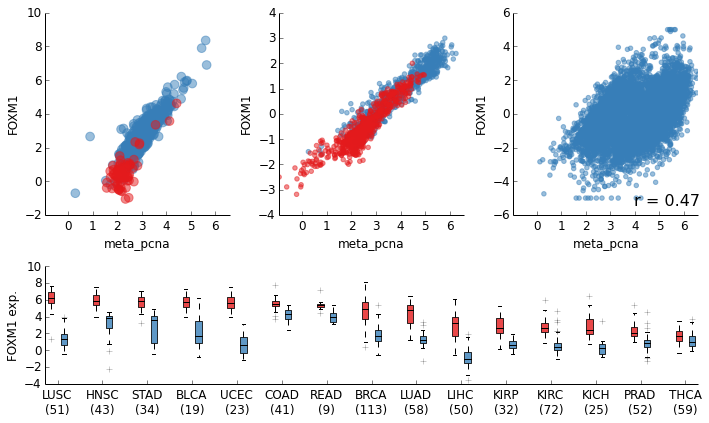

In [3]:
switch_plot('FOXM1')

GABRD is the top hit for tumor-associated, proliferation independent genes.

* Kidney cancer associated with hypertension [link](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3188386/) 
* GABA could have anti-hypertensive effects [link](https://kar.kent.ac.uk/46569/1/__gort_PYR_spk21_My%20Files_Reprints_JNURV2N2A5-Wildman-OA.pdf) 

In [4]:
f_win.order().tail()

CST2        0.42
C16orf13    0.43
GABRD       0.46
SEMA5B      0.48
MIR4508     0.52
Name: fraction overexpressed\n(detrended), dtype: float64

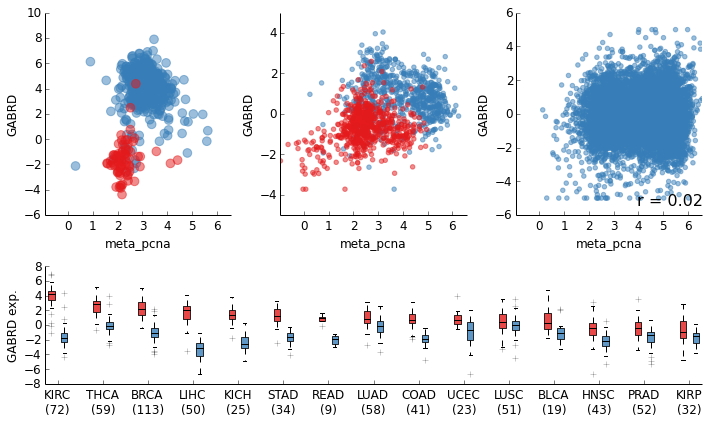

In [5]:
switch_plot('GABRD')

In [6]:
gabra = [g for g in rna_df.index if g.startswith('GABRA')]

In [7]:
gab_s = rna_df.ix[gabra].sum()

In [8]:
cc = codes[codes.isin(ti(codes.value_counts() > 50))]

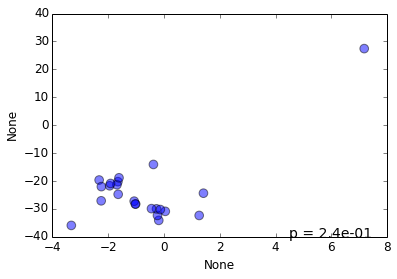

In [9]:
series_scatter(rna_df.ix['GABRD'][:,'11'].groupby(cc).mean(), 
                gab_s[:,'11'].groupby(cc).mean())

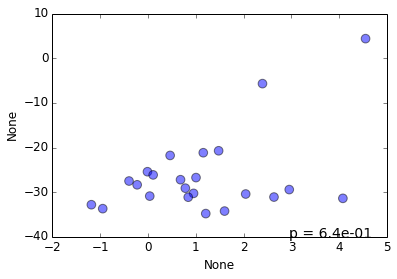

In [10]:
series_scatter(rna_df.ix['GABRD'][:,'01'].groupby(cc).mean(), 
                gab_s[:,'01'].groupby(cc).mean())

In [11]:
gabr = [g for g in rna_df.index if g.startswith('GABR')]
f = dx_rna.ix[gabr].dropna()
f.join(f_win).sort(f_win.name)

,num_ox,num_dx,frac,p,fraction overexpressed (detrended)
GABRA2,141,654,0.22,1.59e-50,-3.19e-01
GABRA4,145,645,0.22,1.39e-46,-2.79e-01
GABRP,248,684,0.36,6.25e-13,-1.74e-01
GABRB1,201,629,0.32,8.11e-20,-1.44e-01
GABRB3,218,684,0.32,1.29e-21,-1.33e-01
GABRG3,273,632,0.43,7.10e-04,-1.16e-01
GABRG1,189,635,0.30,6.76e-25,-1.13e-01
GABRA3,333,602,0.55,1.02e-02,-8.29e-02
GABRB2,245,678,0.36,4.92e-13,-5.59e-02
GABRA5,281,617,0.46,2.96e-02,-5.41e-02


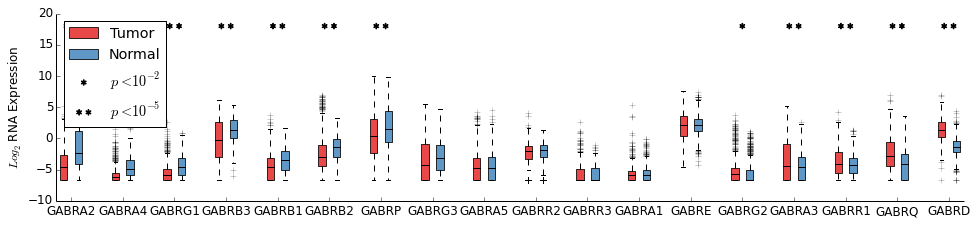

In [12]:
paired_boxplot_tumor_normal(matched_rna.ix[gabr].clip(-9,10).T, 
                            order=list(f.frac.order().index))
prettify_ax(plt.gca())

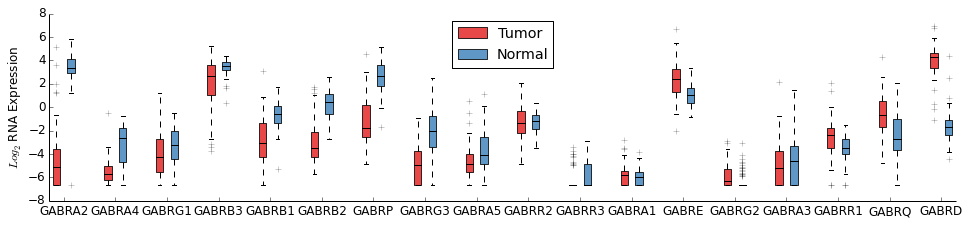

In [14]:
paired_boxplot_tumor_normal(matched_rna.ix[gabr, ti(codes.str.startswith('KIRC'))].clip(-9,10).T, 
                            order=list(f.frac.order().index), sig=False)
prettify_ax(plt.gca())

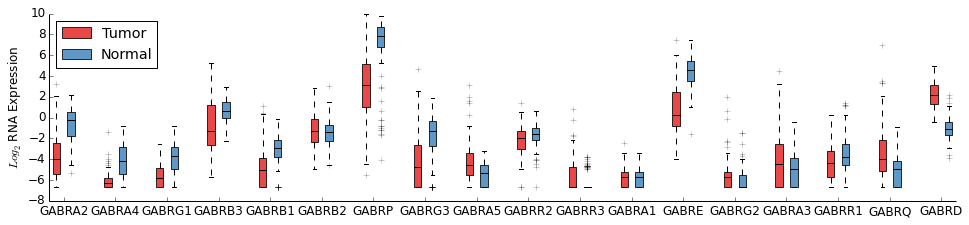

In [15]:
paired_boxplot_tumor_normal(matched_rna.ix[gabr, ti(codes.str.startswith('BRCA'))].clip(-9,10).T, 
                            order=list(f.frac.order().index), sig=False)
prettify_ax(plt.gca())

In [16]:
meta = pd.read_table('/cellar/users/agross/Data/DiffExp/GTEX/GTEx_Data_V4_Annotations_SampleAttributesDS.txt',
                     index_col=0)
gtex_pat = pd.read_table('/cellar/users/agross/Data/DiffExp/GTEX/GTEx_Data_V4_Annotations_SubjectPhenotypes_DS.txt',
                     index_col=0)

gtex = pd.read_table('/cellar/users/agross/Data/DiffExp/GTEX/GTEx_Analysis_2014-01-17_RNA-seq_RNA-SeQCv1.1.8_gene_rpkm.gct',
                     skiprows=2, index_col=[0,1])
gtex.index = gtex.index.get_level_values(1)
gtex = np.log2(gtex)

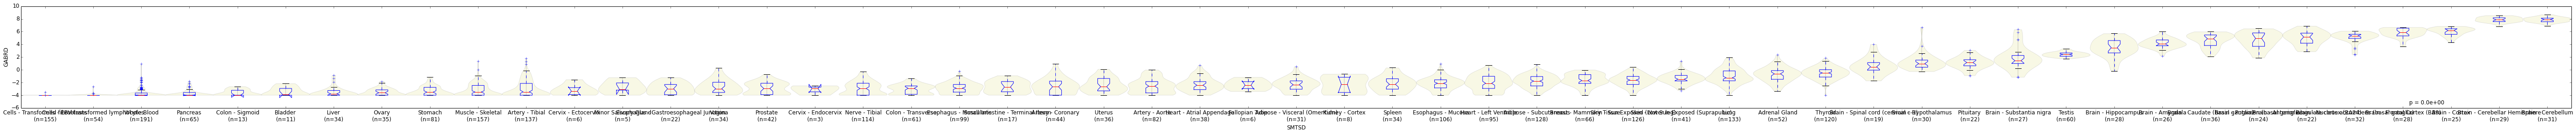

In [17]:
fig, ax = subplots(figsize=(100,4))
violin_plot_pandas(meta['SMTSD'], gtex.ix['GABRD'].dropna().clip_lower(-4), ax=ax,
                   order=gtex.ix['GABRD'].groupby(meta['SMTSD']).median().order().index)

In [18]:
mm =  gtex.ix[gabr].dropna().T.groupby(meta['SMTSD']).median()
mm = mm.clip_lower(-10)

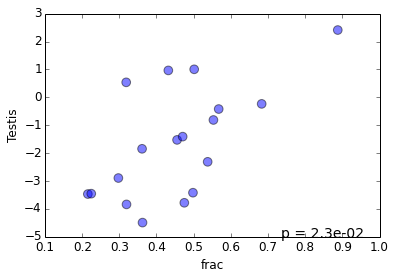

In [19]:
series_scatter(dx_rna.frac.ix[gabr],
               gtex.ix[gabr].dropna().T.groupby(meta['SMTSD']).median().ix['Testis'])

In [20]:
gtex.ix[gabr].dropna().T.groupby(meta['SMTSD']).median().ix['Brain - Cerebellum'].order()

Description
GABRP         -8.19
GABRR3        -7.55
GABRR1        -4.34
GABRQ         -3.09
GABRR2        -3.07
GABRA5        -2.25
GABRE         -1.25
GABRG3        -1.00
GABRA4        -0.76
GABRA3        -0.44
GABRB1        -0.02
GABRA2         1.51
GABRG1         2.65
GABRB3         3.11
GABRG2         4.51
GABRB2         4.74
GABRA1         4.98
GABRA6         6.74
GABRD          7.90
Name: Brain - Cerebellum, dtype: float64

In [21]:
gtex.ix[gabr, ti(meta['SMTSD'] == 'Testis')].T.corr().ix['GABRD'].order()

Description
GABRA4        -0.37
GABRP         -0.23
GABRA6        -0.16
GABRG3        -0.11
GABRA1        -0.04
GABRR2        -0.03
GABRB1        -0.01
GABRA2         0.04
GABRR3         0.04
GABRQ          0.06
GABRG1         0.07
GABRG2         0.18
GABRB2         0.22
GABRB3         0.33
GABRR1         0.35
GABRA5         0.35
GABRA3         0.47
GABRE          0.57
GABRD          1.00
Name: GABRD, dtype: float64

In [22]:
import seaborn as sns

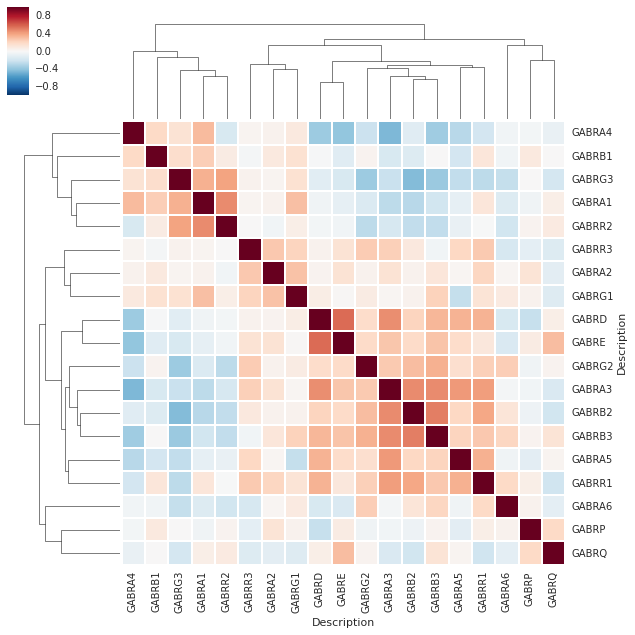

In [23]:
sns.clustermap(gtex.ix[gabr, ti(meta['SMTSD'] == 'Testis')].T.corr())

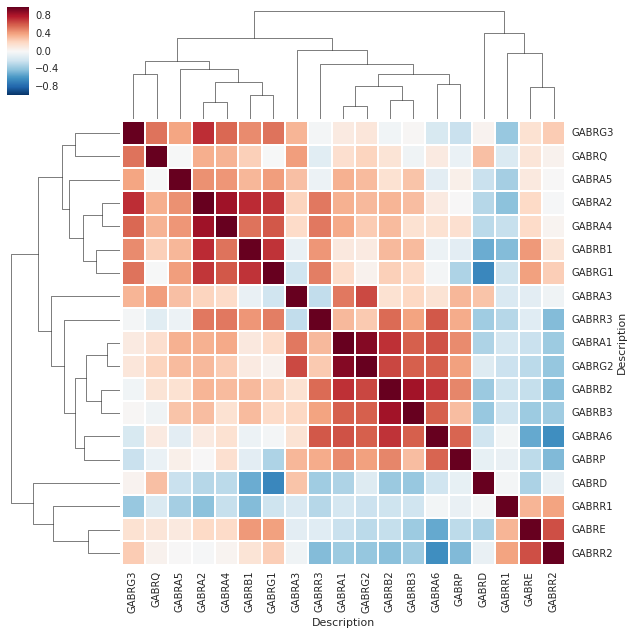

In [24]:
bella = ti(meta['SMTSD'].dropna().str.contains('Cerebellum'))
sns.clustermap(gtex.ix[gabr, bella].T.corr())

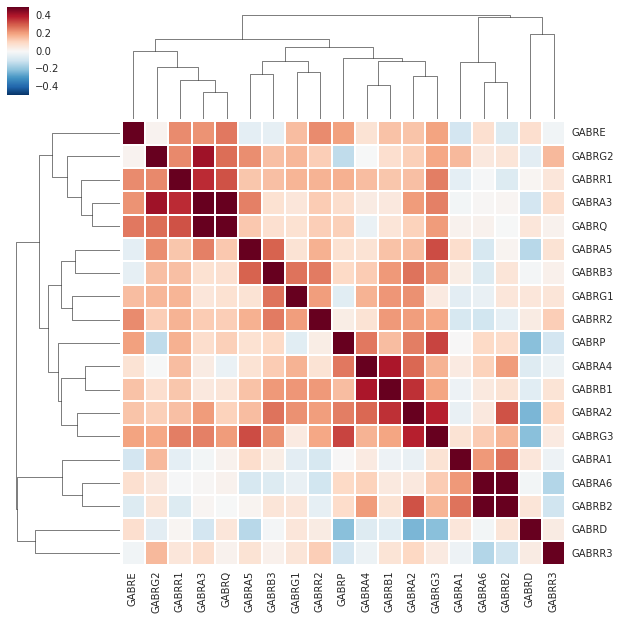

In [25]:
sns.clustermap(dx.ix[gabr].T.corr().clip(-.5,.5))

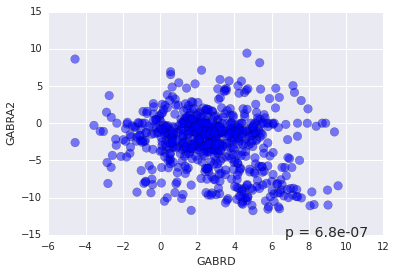

In [26]:
series_scatter(dx.ix['GABRD'], dx.ix['GABRA2'])

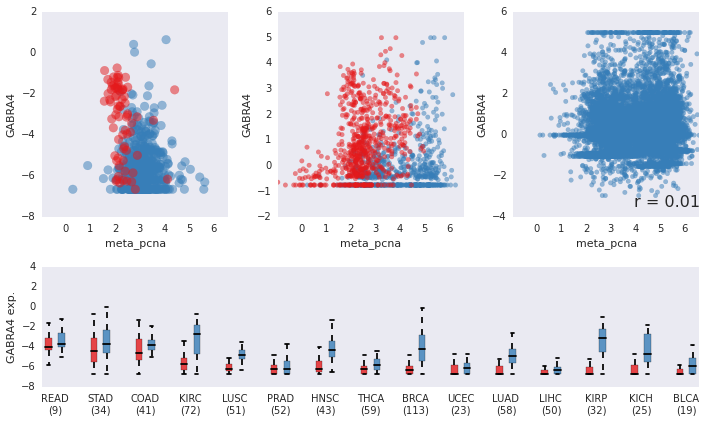

In [27]:
switch_plot('GABRA4')

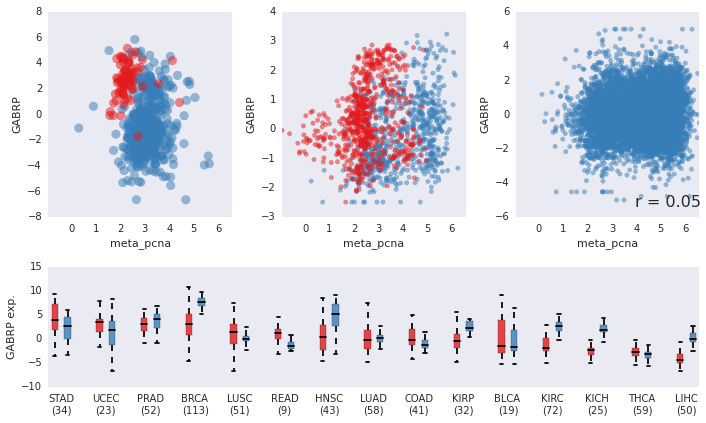

In [28]:
switch_plot('GABRP')

In [30]:
rr = df_s.corrwith(df_s.ix['GABRD'], 1).dropna()
enr = screen_feature(rr.order(), rev_kruskal, gene_sets.T, align=False)
enr.head(4)

,H,p,q
NABA_CORE_MATRISOME,208.89,2.39e-47,3.19e-44
REACTOME_IMMUNE_SYSTEM,150.47,1.37e-34,9.09e-32
REACTOME_OLFACTORY_SIGNALING_PATHWAY,147.17,7.19e-34,3.18e-31
KEGG_OLFACTORY_TRANSDUCTION,146.61,9.55e-34,3.18e-31


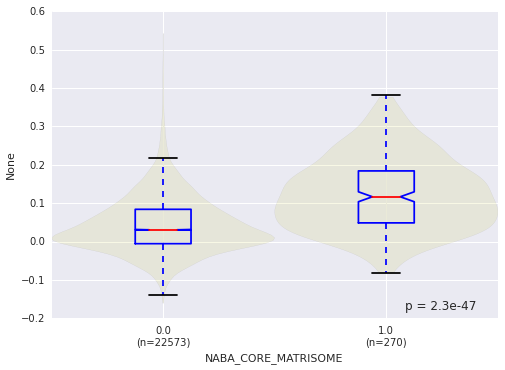

In [31]:
violin_plot_pandas(gene_sets['NABA_CORE_MATRISOME'], rr.replace(1, np.nan))

homocysteine induced smooth muscle cell proliferation

In [92]:
odds, counts = odds_ratio_df(dx>0, dx.ix['GABRD']>0)

In [93]:
enr = screen_feature(np.log2(odds[counts.min(1) > 5]).order(), rev_kruskal, 
                     gene_sets.T, align=False)
enr.head(4)

,H,p,q
NABA_MATRISOME,169.15,1.14e-38,1.51e-35
REACTOME_HEMOSTASIS,138.22,6.51e-32,4.33e-29
NABA_CORE_MATRISOME,132.60,1.11e-30,4.91e-28
KEGG_OLFACTORY_TRANSDUCTION,122.68,1.64e-28,5.44e-26


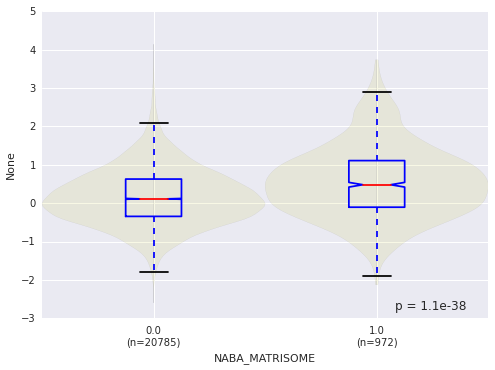

In [95]:
violin_plot_pandas(gene_sets['NABA_MATRISOME'], np.log2(odds[counts.min(1) > 5]).order())

In [32]:
#corr_profile_t = df_s.T.corr()
#corr_profile_t.to_hdf(STORE, 'dfs_correlations')

#corr_profile_m = dx.T.corr()
#corr_profile_m.to_hdf(STORE, 'dx_correlations')

corr_profile_t = pd.read_hdf(STORE, 'dfs_correlations')
corr_profile_m = pd.read_hdf(STORE, 'dx_correlations')
corr_change = corr_profile_m - corr_profile_t

In [33]:
rr = screen_feature(corr_change.ix['GABRD'], rev_kruskal, gene_sets.T)
rr.head()

,H,p,q
REACTOME_IMMUNE_SYSTEM,208.40,3.07e-47,4.08e-44
KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION,114.05,1.27e-26,8.43e-24
REACTOME_IMMUNOREGULATORY_INTERACTIONS_BETWEEN_A_LYMPHOID_AND_A_NON_LYMPHOID_CELL,104.55,1.54e-24,6.81e-22
KEGG_GRAFT_VERSUS_HOST_DISEASE,98.36,3.49e-23,1.16e-20
KEGG_HEMATOPOIETIC_CELL_LINEAGE,96.36,9.57e-23,2.54e-20


In [1]:
idx = gene_sets.index.intersection(corr_change.ix[0].dropna().index)
len(idx)

NameError: name 'gene_sets' is not defined

In [35]:
%%prun
tstats = {}
for gs in rr[rr.q < 10e-10].index:
    mm = corr_change.groupby(gene_sets[gs]).mean()
    vv = corr_change.groupby(gene_sets[gs]).var()
    tt = ((mm.ix[1] - mm.ix[0]) / 
          np.sqrt(vv.div(gene_sets[gs].value_counts(), axis=0)).sum())
    tt = tt.dropna().order()
    tstats[gs] = tt
tstats = pd.DataFrame(tstats)

In [36]:
tstats.rank(ascending=False).ix['GABRD'].order().head(10)

BIOCARTA_NKT_PATHWAY                                              3
KEGG_HEMATOPOIETIC_CELL_LINEAGE                                   9
KEGG_ALLOGRAFT_REJECTION                                         23
KEGG_VIRAL_MYOCARDITIS                                           79
REACTOME_INNATE_IMMUNE_SYSTEM                                    87
PID_TCR_PATHWAY                                                  96
REACTOME_INTERFERON_GAMMA_SIGNALING                             112
REACTOME_IMMUNOREGULATORY_INTERACTIONS_BETWEEN_A_LYMPHOID_AND_A_NON_LYMPHOID_CELL    117
PID_CD8_TCR_PATHWAY                                             140
REACTOME_IMMUNE_SYSTEM                                          143
Name: GABRD, dtype: float64

In [37]:
tstats['BIOCARTA_NKT_PATHWAY'].order().tail()

MEGF11    10.58
MLC1      10.61
GABRD     11.02
CCND1     11.10
TPSD1     11.13
Name: BIOCARTA_NKT_PATHWAY, dtype: float64

In [40]:
corr_change.ix['GABRD'].ix[ti(gene_sets['BIOCARTA_NKT_PATHWAY'] > 0)].order()

IL12RB2   -0.05
IL4        0.02
TGFB3      0.06
IL5        0.10
IL18R1     0.11
CCL3       0.13
IFNGR2     0.14
IL12A      0.14
IL12B      0.15
CSF2       0.16
IL4R       0.17
TGFB2      0.18
CD28       0.19
CCR4       0.19
CCR7       0.19
IL2        0.19
TGFB1      0.20
CCR3       0.21
IFNGR1     0.21
CD4        0.24
CCR1       0.25
IFNG       0.26
CCL4       0.29
CXCR4      0.30
CD40LG     0.31
CCR2       0.32
CCR5       0.34
CXCR3      0.36
IL12RB1    0.36
Name: GABRD, dtype: float64

In [273]:
pd.crosstab(gene_sets['BIOCARTA_NKT_PATHWAY'], 
            gene_sets['KEGG_HEMATOPOIETIC_CELL_LINEAGE'])

KEGG_HEMATOPOIETIC_CELL_LINEAGE,0.0,1.0
BIOCARTA_NKT_PATHWAY,,
0,23257,82
1,24,5


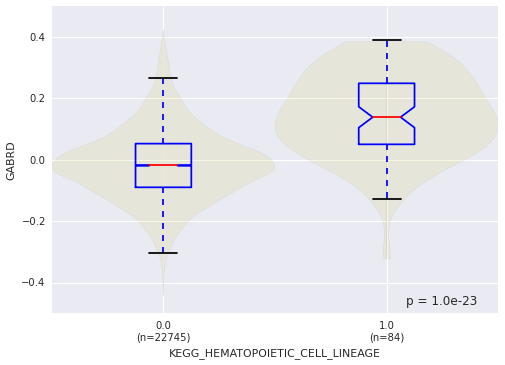

In [271]:
violin_plot_pandas(gene_sets['KEGG_HEMATOPOIETIC_CELL_LINEAGE'], 
                   corr_change.ix['GABRD'].dropna())

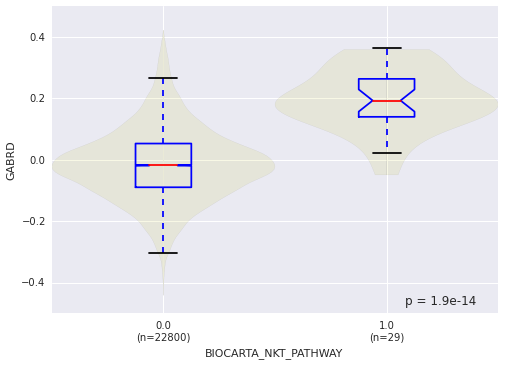

In [272]:
violin_plot_pandas(gene_sets['BIOCARTA_NKT_PATHWAY'], corr_change.ix['GABRD'].dropna())

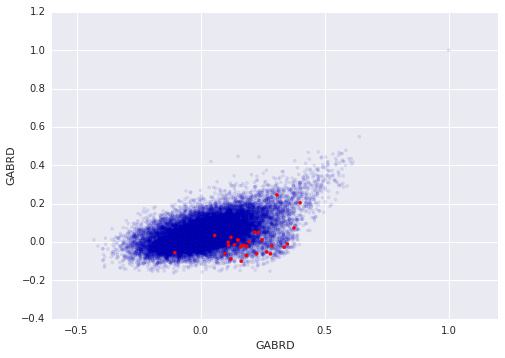

In [275]:
gs = 'BIOCARTA_NKT_PATHWAY'
fig, ax = subplots()
series_scatter(corr_profile_m['GABRD'], corr_profile_t['GABRD'], s=10, ax=ax, ann=None,
               alpha=.1)
series_scatter(corr_profile_m['GABRD'], corr_profile_t['GABRD'].ix[ti(gene_sets[gs]>0)], 
               s=10, ax=ax, color='red', alpha=1, ann=None)

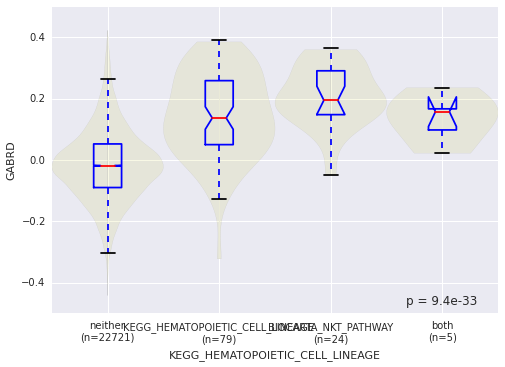

In [267]:
cc = combine(gene_sets['KEGG_HEMATOPOIETIC_CELL_LINEAGE'],
            gene_sets['BIOCARTA_NKT_PATHWAY'])
violin_plot_pandas(cc, corr_change.ix['GABRD'].dropna())

In [299]:
f = pd.read_table('/cellar/users/agross/Downloads_Old/CIBERSORT_ImmunePRECOG_RawData_041015.txt',
                 index_col=0)

In [4]:
f = pd.read_table('/cellar/users/agross/Downloads_Old/LM22.txt',
                 index_col=0)

In [11]:
df = matched_tn
df = df.ix[f.index]
df = df.dropna()
df = 2 ** df
df.columns = ['-'.join(c) for c in df.columns]

In [16]:
df.shape

(520, 1368)

In [17]:
df.to_csv('/cellar/users/agross/Desktop/TCGA_for_CIBERSORT.tab', sep='\t')

In [64]:
cs = pd.read_csv('/cellar/users/agross/Data/DiffExp/CIBERSORT/CIBERSORT.Output_TCGA.csv', index_col=0)

In [65]:
cs.shape

(8556, 25)

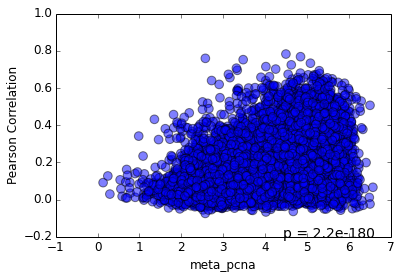

In [86]:
series_scatter(meta_pcna, cs['Pearson Correlation'])

In [97]:
screen_feature(meta_pcna.ix[ti(cs['Pearson Correlation'] > .3)], 
               pearson_pandas, cs.T, align=False).head(10)

,rho,p,q
Macrophages M2,-0.36,1.09e-56,2.72e-55
Macrophages M1,0.34,2.46e-51,3.08e-50
T cells CD4 memory activated,0.32,1.25e-45,1.04e-44
Monocytes,-0.28,9.25e-33,5.78e-32
T cells follicular helper,0.23,2.91e-22,1.45e-21
NK cells resting,0.21,5.05e-19,2.11e-18
Mast cells resting,-0.20,3.44e-18,1.23e-17
T cells CD4 memory resting,-0.15,3.82e-10,1.19e-09
T cells gamma delta,-0.11,1.66e-06,4.61e-06
Pearson Correlation,0.10,1.72e-05,4.31e-05


In [104]:
screen_feature(rna_df.ix['GABRD'][:,'01'].ix[ti(cs['Pearson Correlation'] > .2)], 
               pearson_pandas, cs.T, align=False).head(10)

,rho,p,q
T cells CD4 memory activated,-0.25,9.57e-48,2.39e-46
Macrophages M1,-0.16,2.21e-21,2.76e-20
Dendritic cells activated,-0.16,1.04e-20,8.65e-20
NK cells resting,-0.16,4.41e-20,2.76e-19
RMSE,0.14,1.64e-16,8.20e-16
T cells regulatory (Tregs),0.14,3.77e-15,1.57e-14
Pearson Correlation,-0.13,1.13e-13,4.04e-13
Monocytes,0.11,4.78e-11,1.49e-10
B cells memory,-0.09,1.86e-07,5.17e-07
Mast cells resting,0.09,4.98e-07,1.25e-06


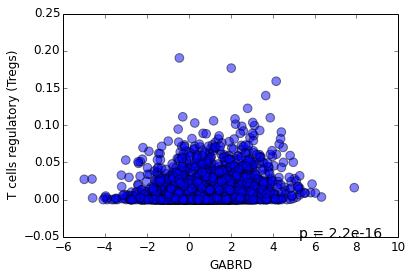

In [108]:
series_scatter(rna_df.ix['GABRD'][:,'01'].ix[ti(cs['Pearson Correlation'] > .3)], 
               cs['T cells regulatory (Tregs)'])

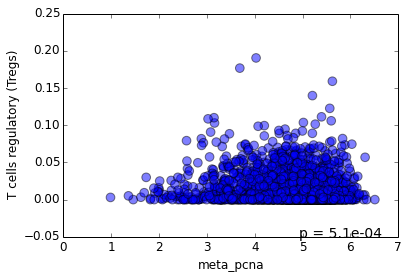

In [109]:
series_scatter(meta_pcna.ix[ti(cs['Pearson Correlation'] > .3)], 
               cs['T cells regulatory (Tregs)'])

In [72]:
screen_feature(dx.ix['GABRD'], pearson_pandas, dd).head(10)

,rho,p,q
P-value,-0.28,1.32e-13,3.31e-12
B cells naive,-0.17,5.25e-06,6.56e-05
Pearson Correlation,0.15,6.46e-05,5.38e-04
RMSE,-0.12,1.36e-03,8.51e-03
T cells CD8,0.12,2.13e-03,1.06e-02
T cells CD4 memory activated,-0.11,2.89e-03,1.20e-02
Eosinophils,-0.10,9.37e-03,2.93e-02
Dendritic cells resting,-0.10,9.39e-03,2.93e-02
T cells CD4 naive,0.09,1.44e-02,3.82e-02
Plasma cells,-0.09,1.53e-02,3.82e-02


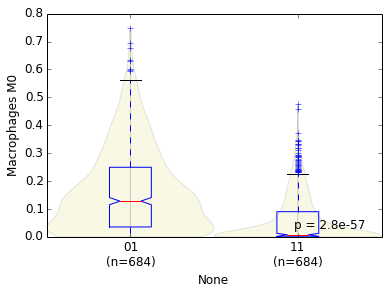

In [44]:
violin_plot_series(cs.ix['Macrophages M0'])

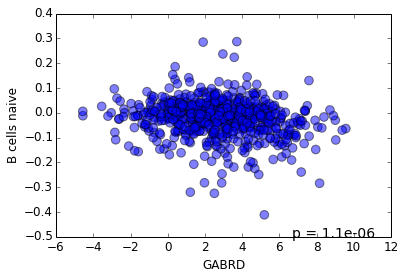

In [45]:
series_scatter(dx.ix['GABRD'], dd.ix['B cells naive'])

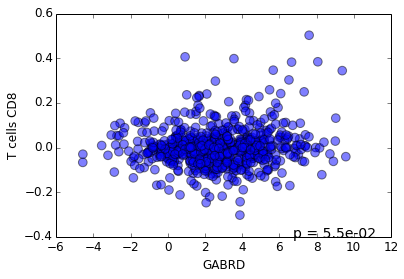

In [46]:
series_scatter(dx.ix['GABRD'], dd.ix['T cells CD8'])